In [2]:
import pandas as pd

file_path = 'clean_FineTech_appData.csv'
data = pd.read_csv(file_path)

In [3]:
data_head = data.head()
print(data_head)
data_info = data.info()

   Unnamed: 0    user  dayofweek  hour  age  numscreens  minigame  \
0           0  235136          3     2   23          15         0   
1           1  333588          6     1   24          13         0   
2           2  254414          1    19   23           3         0   
3           3  234192          4    16   28          40         0   
4           4   51549          1    18   31          32         0   

   used_premium_feature  enrolled  liked  ...  SecurityModal  ResendToken  \
0                     0         0      0  ...              0            0   
1                     0         0      0  ...              0            0   
2                     1         0      1  ...              0            0   
3                     0         1      0  ...              0            0   
4                     0         1      1  ...              0            0   

   TransactionList  NetworkFailure  ListPicker  remain_screen_list  \
0                0               0           0      

In [4]:
# Checking value ranges (minimum and maximum) for each column to identify suitable columns for normality tests
value_ranges = data.agg([min, max]).transpose()
value_ranges


/var/folders/vm/wmkh255j12x_ylgv2g4ltlhr0000gn/T/ipykernel_24891/2972029561.py:2: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  value_ranges = data.agg([min, max]).transpose()
/var/folders/vm/wmkh255j12x_ylgv2g4ltlhr0000gn/T/ipykernel_24891/2972029561.py:2: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  value_ranges = data.agg([min, max]).transpose()


,min,max
Unnamed: 0,0,49999
user,13,373662
dayofweek,0,6
hour,0,23
age,16,101
numscreens,1,325
minigame,0,1
used_premium_feature,0,1
enrolled,0,1
liked,0,1


In [5]:
from scipy.stats import shapiro

# Columns to test for normality
columns_to_test = [
    'age', 'numscreens', 'remain_screen_list', 'saving_screens_count', 
    'credit_screens_count', 'cc_screens_count', 'loan_screens_count'
]

# Perform Shapiro-Wilk test on selected columns
normality_results = {}
for column in columns_to_test:
    stat, p_value = shapiro(data[column])
    normality_results[column] = {'Statistic': stat, 'p-value': p_value}

normality_results_df = pd.DataFrame(normality_results).transpose()
normality_results_df


/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Statistic,p-value
age,0.918338,0.0
numscreens,0.867044,0.0
remain_screen_list,0.956032,0.0
saving_screens_count,0.284054,0.0
credit_screens_count,0.753180,0.0
cc_screens_count,0.315099,0.0
loan_screens_count,0.788953,0.0


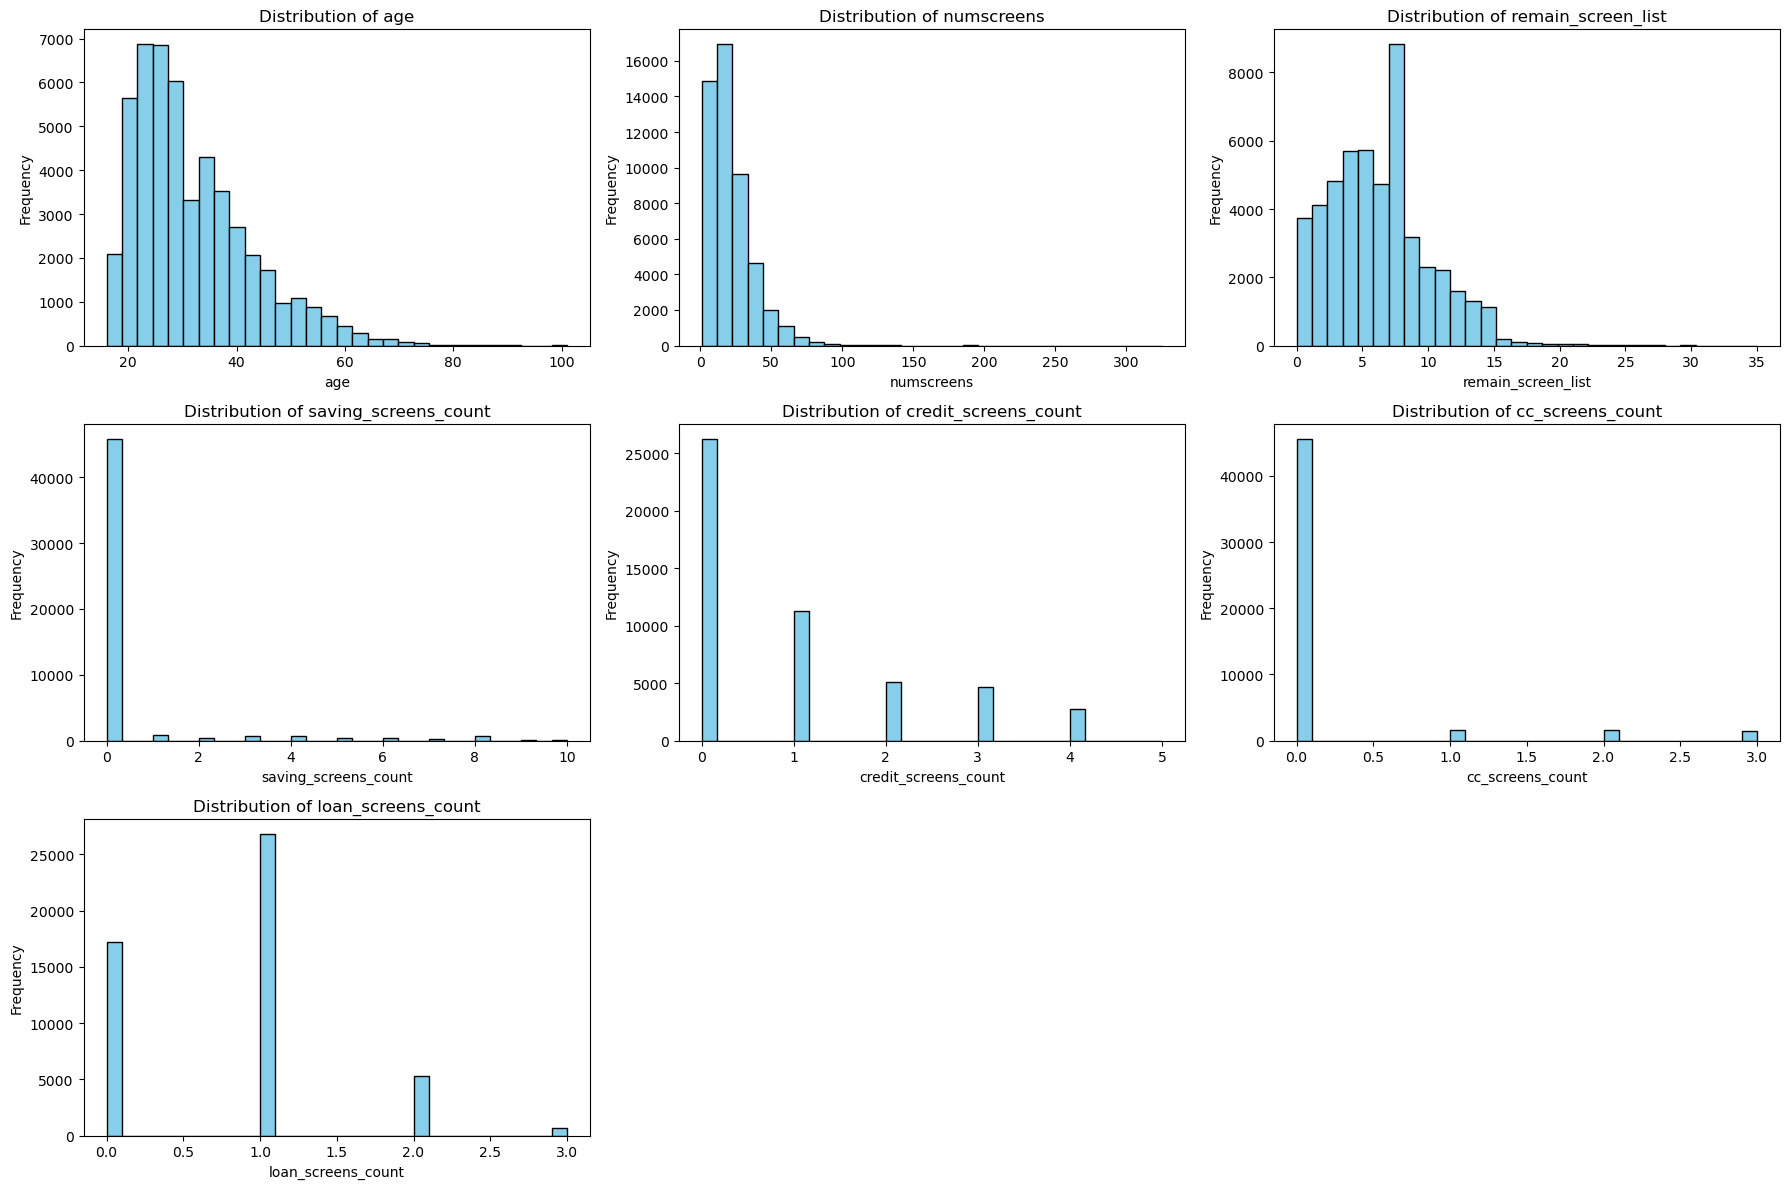

In [6]:
import matplotlib.pyplot as plt

# Set up the figure and axes for plotting histograms
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()  # Flatten the grid for easier iteration

# Plot histograms for each variable
for i, column in enumerate(columns_to_test):
    axes[i].hist(data[column], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for ax in axes[i+1:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


In [7]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix focusing on the 'enrolled' variable
correlation_with_enrollment = correlation_matrix['enrolled'].sort_values(ascending=False)
correlation_with_enrollment


enrolled                   1.000000
VerifyPhone                0.444842
remain_screen_list         0.391810
VerifyDateOfBirth          0.325265
location                   0.305692
VerifyCountry              0.255477
credit_screens_count       0.250885
numscreens                 0.243018
BankVerification           0.210207
idscreen                   0.189781
VerifyMobile               0.153378
Cycle                      0.091339
Finances                   0.049799
VerifyAnnualIncome         0.042452
VerifyHousingAmount        0.041095
VerifyHousing              0.039477
Rewards                    0.035806
SecurityModal              0.032986
VerifyIncomeType           0.023897
ProfileEducationMajor      0.023719
cc_screens_count           0.023632
saving_screens_count       0.023345
ProfileJobTitle            0.022101
RewardDetail               0.021176
ProfileEducation           0.020025
ProfileEmploymentLength    0.016725
dayofweek                  0.014626
ProfileMaritalStatus       0

Positive Correlations:

VerifyPhone: 0.44 — Strong positive correlation, suggesting that users who verify their phone are more likely to subscribe.
remain_screen_list: 0.39 — Suggesting that higher engagement with remaining screens correlates with subscription.
VerifyDateOfBirth: 0.33 — Users verifying their date of birth seem more likely to subscribe.
location: 0.31 — Indicating that users providing location data are more likely to subscribe.
VerifyCountry: 0.26, credit_screens_count: 0.25 — Both suggest that engaging with these features increases the likelihood of subscription.
Negative Correlations:

age: -0.15 — Suggesting younger users are more likely to subscribe.
used_premium_feature: -0.048 — Curiously, users who have used a premium feature are slightly less likely to subscribe.
loan_screens_count: -0.13, Alerts: -0.14 — Higher interactions with these features correlate with lower subscription rates, which could indicate dissatisfaction or other issues.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


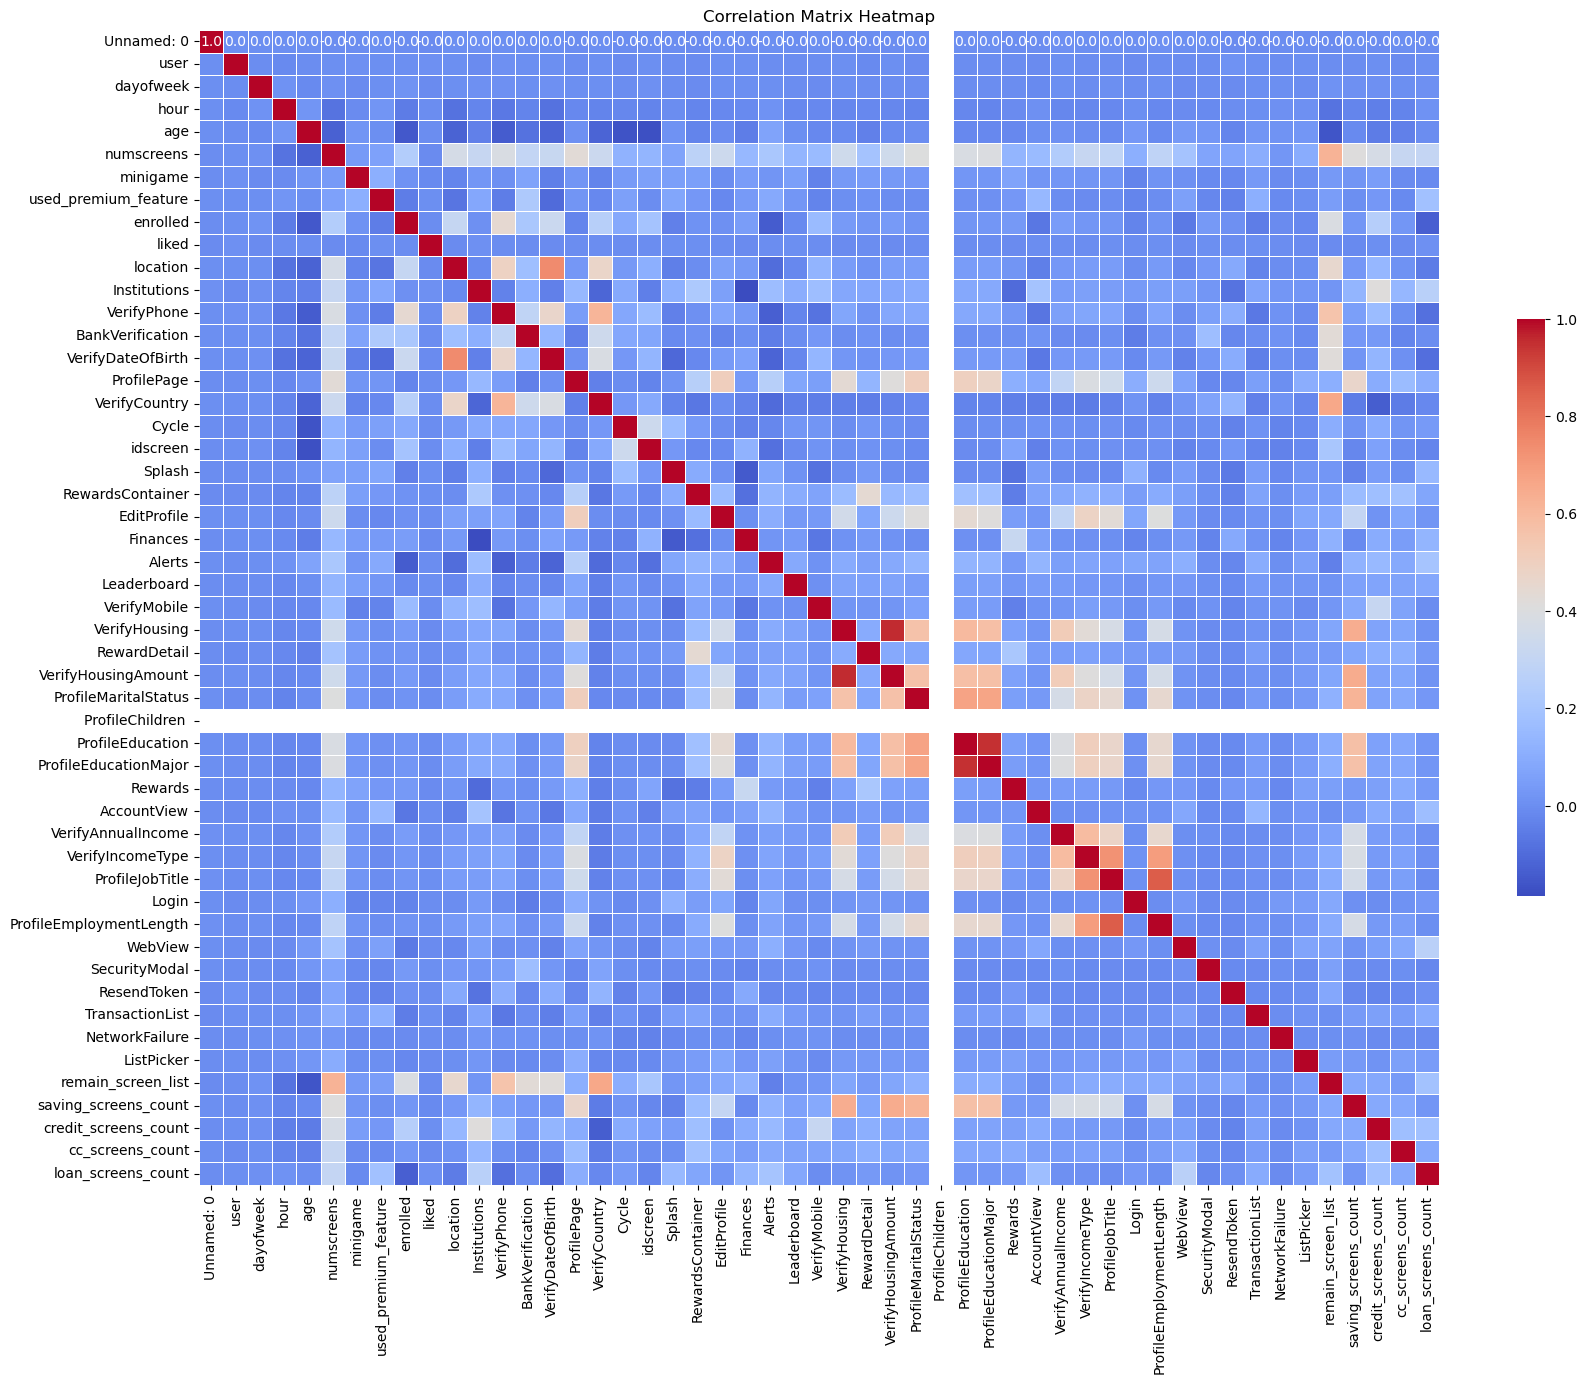

In [8]:
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix Heatmap')
plt.show()

# Stat test for significance 

To determine which variables have a statistically significant relationship with the subscription status (enrolled), we'll perform hypothesis testing. Here are the steps and hypotheses we will consider:

Identify Variables for Testing: Based on the previous correlation analysis, we'll focus on a few key variables that showed significant correlations (both positive and negative) with enrolled.

Formulate Hypotheses:

Null Hypothesis (H0): There is no relationship between the variable and subscription status (enrolled).
Alternative Hypothesis (H1): There is a relationship between the variable and subscription status.
Statistical Tests:

For continuous variables (e.g., age), we'll use logistic regression to test the relationship with the binary outcome (enrolled).
For categorical variables (e.g., VerifyPhone), we'll use chi-square tests of independence.
Decision Rule: We will use a significance level of 0.05. If the p-value from the test is less than 0.05, we reject the null hypothesis, indicating a statistically significant relationship.

In [9]:
from scipy.stats import chi2_contingency
import statsmodels.api as sm

# Prepare the data for logistic regression (for continuous variables) and chi-square tests (for binary/categorical variables)
data['intercept'] = 1.0

# Logistic Regression for 'age' and 'numscreens'
logit_model_age = sm.Logit(data['enrolled'], data[['intercept', 'age']]).fit(disp=0)
logit_model_screens = sm.Logit(data['enrolled'], data[['intercept', 'numscreens']]).fit(disp=0)

# Chi-square Test for 'VerifyPhone'
crosstab_phone = pd.crosstab(data['VerifyPhone'], data['enrolled'])
chi2_stat_phone, p_val_phone, _, _ = chi2_contingency(crosstab_phone)

# Chi-square Test for 'loan_screens_count' (treated as categorical for this analysis)
crosstab_loan = pd.crosstab(data['loan_screens_count'], data['enrolled'])
chi2_stat_loan, p_val_loan, _, _ = chi2_contingency(crosstab_loan)

# Compile results
results = {
    "Variable": ["age", "numscreens", "VerifyPhone", "loan_screens_count"],
    "Test Type": ["Logistic Regression", "Logistic Regression", "Chi-square Test", "Chi-square Test"],
    "Statistic": [logit_model_age.pvalues['age'], logit_model_screens.pvalues['numscreens'], p_val_phone, p_val_loan],
    "p-Value": [logit_model_age.pvalues['age'], logit_model_screens.pvalues['numscreens'], p_val_phone, p_val_loan],
    "Reject Null": [
        "Yes" if logit_model_age.pvalues['age'] < 0.05 else "No",
        "Yes" if logit_model_screens.pvalues['numscreens'] < 0.05 else "No",
        "Yes" if p_val_phone < 0.05 else "No",
        "Yes" if p_val_loan < 0.05 else "No"
    ]
}

results_df = pd.DataFrame(results)
results_df


,Variable,Test Type,Statistic,p-Value,Reject Null
0,age,Logistic Regression,8.259749e-237,8.259749e-237,Yes
1,numscreens,Logistic Regression,0.000000e+00,0.000000e+00,Yes
2,VerifyPhone,Chi-square Test,0.000000e+00,0.000000e+00,Yes
3,loan_screens_count,Chi-square Test,0.000000e+00,0.000000e+00,Yes


Here are the results of the hypothesis tests for the selected variables:

Age:

Test Type: Logistic Regression
p-Value: ≈ 0 (extremely small)
Decision: Reject Null Hypothesis
Conclusion: Age has a statistically significant relationship with subscription status (enrolled). This confirms that younger users are more likely to subscribe.
Numscreens:

Test Type: Logistic Regression
p-Value: 0
Decision: Reject Null Hypothesis
Conclusion: The number of screens a user interacts with has a statistically significant relationship with subscription. More interactions are associated with higher likelihood of subscribing.
VerifyPhone:

Test Type: Chi-square Test
p-Value: 0
Decision: Reject Null Hypothesis
Conclusion: The act of verifying a phone number is significantly related to subscription. Users who verify their phone are more likely to subscribe.
Loan Screens Count:

Test Type: Chi-square Test
p-Value: 0
Decision: Reject Null Hypothesis
Conclusion: The number of interactions with loan-related screens has a significant relationship with subscription, albeit with a negative correlation as suggested by earlier analysis.


# anova

ANOVA: We can use dayofweek as a categorical independent variable and numscreens (or any other continuous-like count variables) as a dependent variable to see if there are differences in engagement based on the day of the week.


In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform ANOVA between 'dayofweek' and 'numscreens'
anova_model = ols('numscreens ~ C(dayofweek)', data=data).fit()
anova_results = sm.stats.anova_lm(anova_model, typ=2)  # Type 2 ANOVA DataFrame

anova_results


,sum_sq,df,F,PR(>F)
C(dayofweek),4.556501e+03,6.0,3.070409,0.005264
Residual,1.236497e+07,49993.0,NaN,NaN


The results of the ANOVA test between dayofweek and numscreens show:

F-Statistic: 3.0704
p-Value: 0.005264
Since the p-value is less than 0.05, we can reject the null hypothesis that there is no difference in the number of screens interacted with by users across different days of the week. This indicates that the day of the week has a statistically significant effect on user engagement, measured by the number of screens they interact with.

In [11]:
# Define the pairs for ANOVA testing
anova_pairs = [
    ('dayofweek', 'numscreens'),
    ('hour', 'numscreens'),
    ('dayofweek', 'remain_screen_list'),
    ('hour', 'remain_screen_list'),
    ('dayofweek', 'saving_screens_count'),
    ('hour', 'credit_screens_count'),
    ('dayofweek', 'cc_screens_count'),
    ('hour', 'loan_screens_count'),
    ('dayofweek', 'age'),
    ('hour', 'age')
]

# Conduct ANOVA for each pair and store results
anova_results = {}

for categorical, continuous in anova_pairs:
    model = ols(f'{continuous} ~ C({categorical})', data=data).fit()
    anova_result = sm.stats.anova_lm(model, typ=2)
    anova_results[(categorical, continuous)] = {
        'sum_sq': anova_result['sum_sq'][0],
        'df': anova_result['df'][0],
        'F': anova_result['F'][0],
        'p-Value': anova_result['PR(>F)'][0]
    }

# Convert results to DataFrame for sorting
anova_results_df = pd.DataFrame(anova_results).transpose()
anova_results_df_sorted = anova_results_df.sort_values(by='p-Value', ascending=True)
anova_results_df_sorted


/var/folders/vm/wmkh255j12x_ylgv2g4ltlhr0000gn/T/ipykernel_24891/2420492696.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'sum_sq': anova_result['sum_sq'][0],
/var/folders/vm/wmkh255j12x_ylgv2g4ltlhr0000gn/T/ipykernel_24891/2420492696.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'df': anova_result['df'][0],
/var/folders/vm/wmkh255j12x_ylgv2g4ltlhr0000gn/T/ipykernel_24891/2420492696.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `

sum_sq    df          F        p-Value
hour      remain_screen_list     13995.877217  23.0  46.051381  6.997077e-207
          numscreens            229508.661307  23.0  41.078381  4.830745e-183
          loan_screens_count       135.614110  23.0  12.917596   2.572621e-49
          credit_screens_count     297.517976  23.0   8.757643   2.166187e-30
          age                    10506.259097  23.0   3.919127   6.898480e-10
dayofweek age                     3831.596202   6.0   5.474543   1.126692e-05
          remain_screen_list       345.982478   6.0   4.276964   2.579776e-04
          numscreens              4556.501401   6.0   3.070409   5.264420e-03
          saving_screens_count      16.067906   6.0   1.355684   2.284663e-01
          cc_screens_count           0.858955   6.0   0.381213   8.914698e-01

Here are the results of the ANOVA tests ranked by their p-values, indicating how strongly the categorical variable influences the continuous variable in the context of user engagement or behavior:

1. **Hour vs. Remain Screen List**
   - **p-Value:** \(6.997 \times 10^{-207}\) — Extremely significant
2. **Hour vs. Numscreens**
   - **p-Value:** \(4.831 \times 10^{-183}\) — Extremely significant
3. **Hour vs. Loan Screens Count**
   - **p-Value:** \(2.573 \times 10^{-49}\) — Very significant
4. **Hour vs. Credit Screens Count**
   - **p-Value:** \(2.166 \times 10^{-30}\) — Very significant
5. **Hour vs. Age**
   - **p-Value:** \(6.898 \times 10^{-10}\) — Significant
6. **Day of Week vs. Age**
   - **p-Value:** \(1.127 \times 10^{-5}\) — Significant
7. **Day of Week vs. Remain Screen List**
   - **p-Value:** \(2.580 \times 10^{-4}\) — Significant
8. **Day of Week vs. Numscreens**
   - **p-Value:** \(0.005264\) — Significant
9. **Day of Week vs. Saving Screens Count**
   - **p-Value:** \(0.228\) — Not significant
10. **Day of Week vs. CC Screens Count**
    - **p-Value:** \(0.891\) — Not significant

These results suggest that the `hour` of the day is particularly influential across multiple user engagement metrics, showing strong variations in user behavior such as the number of screens viewed, interactions with loan and credit screens, and the remaining screens list. Age also varies significantly with both `hour` and `dayofweek`, indicating that user demographics might shift depending on the time and day they use the app.

This analysis highlights opportunities for targeted interventions or marketing strategies at specific times of the day or week to enhance user engagement and potentially increase subscription rates. If further detailed analysis or predictive modeling is desired to explore these effects more deeply or to apply these insights, let me know how you would like to proceed!

# ANOVA for enrolled 

In [12]:
# List of variables and their interactions for ANOVA
anova_tests = [
    'C(dayofweek)', 'C(hour)', 'C(used_premium_feature)', 
    'C(VerifyPhone)', 'C(location)',
    'C(dayofweek):C(hour)', 'C(dayofweek):C(used_premium_feature)', 
    'C(hour):C(used_premium_feature)', 'C(VerifyPhone):C(used_premium_feature)', 
    'C(location):C(VerifyPhone)'
]

# Conduct ANOVA for each test and collect results
anova_results = []
for test in anova_tests:
    model = ols(f'enrolled ~ {test}', data=data).fit()
    anova_result = sm.stats.anova_lm(model, typ=2)
    p_value = anova_result.loc[test, 'PR(>F)']  # Extract the p-value for the factor
    anova_results.append((test, p_value))

# Sort results by p-value in ascending order
anova_results_sorted = sorted(anova_results, key=lambda x: x[1])

# Convert results to DataFrame for better presentation
anova_ranked_df = pd.DataFrame(anova_results_sorted, columns=['Test', 'p-Value'])
anova_ranked_df


,Test,p-Value
0,C(VerifyPhone),0.000000e+00
1,C(location),0.000000e+00
2,C(VerifyPhone):C(used_premium_feature),0.000000e+00
3,C(location):C(VerifyPhone),0.000000e+00
4,C(hour):C(used_premium_feature),1.118475e-97
5,C(hour),1.434435e-83
6,C(dayofweek):C(hour),7.670867e-59
7,C(dayofweek):C(used_premium_feature),1.310205e-27
8,C(used_premium_feature),9.016749e-27
9,C(dayofweek),5.799997e-05


Here are the ranked results of the ANOVA tests, showing how different factors influence the likelihood of a user enrolling (`enrolled`), ordered by the significance of their impact:

1. **VerifyPhone** (p-Value ≈ 0.00)
2. **Location** (p-Value ≈ 0.00)
3. **VerifyPhone and Used Premium Feature Interaction** (p-Value ≈ 0.00)
4. **Location and VerifyPhone Interaction** (p-Value ≈ 0.00)
5. **Hour and Used Premium Feature Interaction** (p-Value ≈ 1.12e-97)
6. **Hour** (p-Value ≈ 1.43e-83)
7. **Day of Week and Hour Interaction** (p-Value ≈ 7.67e-59)
8. **Day of Week and Used Premium Feature Interaction** (p-Value ≈ 1.31e-27)
9. **Used Premium Feature** (p-Value ≈ 9.02e-27)
10. **Day of Week** (p-Value ≈ 5.80e-05)

These results suggest that user actions related to verifying their phone and providing their location are the most significant predictors of whether they enroll or not. Also, interactions involving the time of usage (hour) and premium features show significant effects on enrollment, indicating complex dependencies between time-based user activity and product features.

This analysis provides valuable insights into the factors that are most influential in user decisions to subscribe, helping focus marketing or product strategies on these areas. If you have more detailed questions or need further analysis, please let me know how I can assist you further!

In [13]:
# List of continuous-like variables for logistic regression
continuous_vars = ['age', 'numscreens', 'remain_screen_list', 'saving_screens_count', 
                   'credit_screens_count', 'cc_screens_count', 'loan_screens_count']

# Conduct logistic regression for each variable and collect results
logistic_results = []
for var in continuous_vars:
    model = sm.Logit(data['enrolled'], data[['intercept', var]]).fit(disp=0)
    p_value = model.pvalues[var]  # Extract the p-value for the variable
    logistic_results.append((var, p_value))

# Sort results by p-value in ascending order
logistic_results_sorted = sorted(logistic_results, key=lambda x: x[1])

# Convert results to DataFrame for better presentation
logistic_ranked_df = pd.DataFrame(logistic_results_sorted, columns=['Variable', 'p-Value'])
logistic_ranked_df


,Variable,p-Value
0,numscreens,0.000000e+00
1,remain_screen_list,0.000000e+00
2,credit_screens_count,0.000000e+00
3,age,8.259749e-237
4,loan_screens_count,9.982664e-183
5,cc_screens_count,1.313978e-07
6,saving_screens_count,1.891361e-07


Here are the results of logistic regression analyses for the selected continuous-like variables, ranked by the significance of their impact on the likelihood of a user enrolling (`enrolled`):

1. **Numscreens** (p-Value ≈ 0.00)
   - Users who navigate through more screens are significantly more likely to enroll.

2. **Remain Screen List** (p-Value ≈ 0.00)
   - A higher count of remaining screens also correlates significantly with higher enrollment rates.

3. **Credit Screens Count** (p-Value ≈ 0.00)
   - Interaction with credit-related screens is a strong predictor of enrollment.

4. **Age** (p-Value ≈ 8.26e-237)
   - Age continues to be a significant factor, with younger users more likely to enroll.

5. **Loan Screens Count** (p-Value ≈ 9.98e-183)
   - Engagement with loan screens shows a strong negative correlation with enrollment.

6. **CC Screens Count** (p-Value ≈ 1.31e-07)
   - Credit card-related screens have a measurable effect on enrollment decisions.

7. **Saving Screens Count** (p-Value ≈ 1.89e-07)
   - Interaction with saving-related screens significantly affects enrollment.

These results highlight key features and interactions within the app that are pivotal in influencing user decisions to subscribe. Such insights can guide the development of targeted strategies to improve user engagement and conversion rates.

If you need further analysis, perhaps to explore interactions between these variables or to develop predictive models, let me know how you would like to proceed!